In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pylab as plt

In [2]:
cancer = load_breast_cancer()
print(cancer.DESCR)
print(cancer.feature_names)
print(cancer.target_names)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [4]:
cancer.data.shape

(569, 30)

In [5]:
cancer.target[0]

0

In [6]:
test_size = 100
batch_size = 50

X_test = cancer.data[batch_size:batch_size + test_size]
y_test = cancer.target[batch_size:batch_size + test_size]
X_train = cancer.data[:batch_size]
y_train = cancer.target[:batch_size]

clf_log = LogisticRegression()

pipeline = Pipeline([('log', clf_log)])
model = pipeline.fit(X_train, y_train)
# Evaluate your model.
predicted = model.predict(X_test)

print("Evaluation report: \n\n%s" % metrics.classification_report(y_test, predicted))

Evaluation report: 

              precision    recall  f1-score   support

           0       0.73      0.95      0.83        40
           1       0.96      0.77      0.85        60

   micro avg       0.84      0.84      0.84       100
   macro avg       0.84      0.86      0.84       100
weighted avg       0.87      0.84      0.84       100



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
ini_tr_accuarcy = model.score(X_train,y_train)
ini_te_accuarcy = model.score(X_test,y_test)
ini_model = model

print(f'Accuracy on the training set: {ini_tr_accuarcy}')
print(f'Accuracy on the testing set: {ini_te_accuarcy}')

Accuracy on the training set: 0.98
Accuracy on the testing set: 0.84


In [8]:
tr_accuarcy = []
te_accuarcy = []
models = []

tr_accuarcy.append(ini_tr_accuarcy)
te_accuarcy.append(ini_te_accuarcy)
models.append(ini_model)

sample_size = batch_size + test_size

In [9]:
sample_size_list = [batch_size + test_size, 163, 210, 260, 285, 300, 370, 402, 461, 500, 569]

for sample_size_new in sample_size_list:
    if sample_size_new == batch_size + test_size:
        continue
    elif ((sample_size_new - sample_size) >= batch_size):
        X_train = cancer.data[:sample_size_new - test_size]
        y_train = cancer.target[:sample_size_new - test_size]
        model_new = pipeline.fit(X_train, y_train)
        sample_size = sample_size_new
    else:
        model_new = models[len(models)-1]
    X_test = cancer.data[sample_size_new - test_size:sample_size_new]
    y_test = cancer.target[sample_size_new - test_size:sample_size_new]
    tr_accuarcy.append(model_new.score(X_train,y_train))
    te_accuarcy.append(model_new.score(X_test,y_test))
    models.append(model_new)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

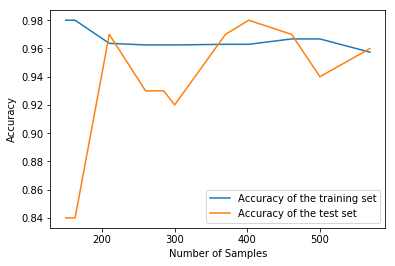

In [10]:
plt.plot(sample_size_list, tr_accuarcy, label='Accuracy of the training set')
plt.plot(sample_size_list, te_accuarcy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples')
plt.legend()